In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
from common import NWSL, Fonts, Colors, Images, add_twitter_handle, add_source, Data

In [5]:
matches

,date,time,season,home,away,home_score,away_score,home_penalty_score,away_penalty_score,home_xg,away_xg,referee,attendance,stadium,is_forfeit,is_extra_time,is_pks,is_playoffs
0,2013-04-13,19:35,2013,KC,POR,1,1,0.0,0.0,NaN,NaN,Kari Seitz,6784.0,Shawnee Mission District Stadium,False,False,False,False
1,2013-04-14,17:00,2013,CHI,RGN,1,1,0.0,0.0,NaN,NaN,Josh Wilkens,1255.0,Village of Lisle-Benedictine University ...,False,False,False,False
2,2013-04-14,18:00,2013,NJNY,WNY,1,0,0.0,0.0,NaN,NaN,John McCloskey,2611.0,Yurcak Field,False,False,False,False
3,2013-04-14,18:30,2013,BOS,WAS,1,1,0.0,0.0,NaN,NaN,Hernan Aguilar,2634.0,Dilboy Stadium,False,False,False,False
4,2013-04-20,19:00,2013,WAS,WNY,1,1,0.0,0.0,NaN,NaN,Kari Seitz,4569.0,Maureen Hendricks Field at Maryland Socc...,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,2023-10-15,17:00,2023,NJNY,KCC,2,2,0.0,0.0,1.3,0.7,Alyssa Nichols,9005.0,Red Bull Arena,False,False,False,False
1277,2023-10-20,19:00,2023,RGN,LA,1,0,0.0,0.0,0.6,0.2,Brad Jensen,12152.0,Lumen Field,False,False,False,True
1278,2023-10-22,19:00,2023,NC,NJNY,0,2,0.0,0.0,0.6,1.0,Katja Koroleva,4612.0,Sahlen's Stadium at WakeMed Soccer Park,False,False,False,True
1279,2023-11-05,16:00,2023,POR,NJNY,0,1,0.0,0.0,0.6,0.5,Danielle Chesky,25218.0,Providence Park,False,True,False,True


In [11]:
# Generate dataset which is a table showing the frequency with which each goal count appeared
matches = Data.get_nwsl_matches()
matches = matches[~matches["is_playoffs"]]

df = pd.DataFrame([])
for season in matches["season"].unique():
    if "Challenge" in season or "Fall" in season:
        continue
    season_matches = matches[matches["season"] == season]
    season_matches = season_matches.sort_values("date")
    subset = season_matches
    subset["goals"] = subset["home_score"] + subset["away_score"]
    agg = subset.groupby("goals").agg(goals=("goals", "count")).rename(columns={"goals": season}).T
    df = df.append(agg)
    
df = df.fillna(0)
df = df.astype(int)
    
df

goals,0,1,2,3,4,5,6,7,8,9
2013,4,16,26,20,9,6,5,2,0,0
2014,2,22,26,19,14,16,5,2,1,1
2015,5,15,21,22,13,9,4,1,0,0
2016,7,23,21,22,13,8,3,2,1,0
2017,5,25,29,22,18,13,3,2,1,2
2018,9,22,28,18,16,11,1,3,0,0
2019,7,25,20,31,13,6,1,4,1,0
2021,11,23,34,31,12,8,1,0,0,0
2022,8,29,21,31,25,8,7,3,0,0
2023,11,27,31,32,13,10,6,1,0,1


<Figure size 720x576 with 0 Axes>

<Figure size 2000x1600 with 0 Axes>

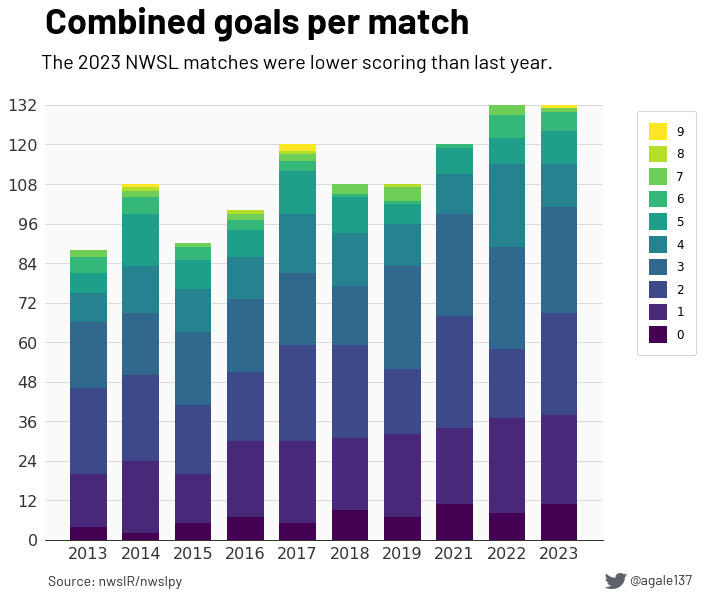

In [20]:
plt.clf()
plt.rcParams["figure.figsize"] = (10, 8)
plt.figure(dpi=200, facecolor="white")
fig, ax = plt.subplots()
fig.patch.set_facecolor("white")
ax.set_facecolor(Colors.WHITE)

cmap = matplotlib.cm.get_cmap("viridis")

rgba = cmap(0.5)
bottom = np.zeros(len(df.index))

# Plot each metric
for i in df.columns:
    ax.bar(
        df.index,
        df[i],
        color=cmap(i / (len(df.columns) - 1)),
        bottom=bottom,
        label=i,
        width=0.7,
    )
    bottom += np.array(df[i].values)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
    reversed(handles),
    reversed(labels),
    bbox_to_anchor=(1.05, 1.0),
    loc="upper left",
    borderpad=1,
    handlelength=1.5,
    handleheight=1.75,
    fontsize=12,
)

# Axes and ticks
N=6*22
ax.spines[["top", "left", "right"]].set_visible(False)
ax.set_axisbelow(True)
ax.set_yticks(list(map(lambda x: x * 12, range(0, int(N / 12) + 1))))
ax.yaxis.grid(True, color=Colors.LIGHT_GRAY)
ax.tick_params(axis="both", which="major", labelsize=16, labelcolor=Colors.BLACK)
ax.tick_params(bottom=False, left=False)


# Title
ax.set_title(
    "Combined goals per match",
    fontproperties=Fonts.BARLOW_BOLD,
    size=36,
    ha="left",
    x=0,
    y=1.15,
)

# Subtitle
ax.text(
    -0.9,
    143,
    "The 2023 NWSL matches were lower scoring than last year.",
    fontproperties=Fonts.BARLOW,
    size=20,
    ha="left",
)

# Twitter logo and username
add_twitter_handle(fig, x=0.9, y=0.04, fs=14, w=0.03)

# Save image
plt.savefig(
    "images/goals_frequency.png",
    bbox_inches="tight",
    transparent=False,
    pad_inches=0.5,
    dpi=200,
)